In [2]:
import insightface
import urllib
import urllib.request
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
cosine_threshold = 0.4
color = (0, 0, 255)
ctx_id = 0
font = cv2.FONT_HERSHEY_SIMPLEX

In [4]:
def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image

In [5]:
def findCosineDistance(vector1, vector2):
    vec1 = vector1.flatten()
    vec2 = vector2.flatten()

    a = np.dot(vec1.T, vec2)
    b = np.dot(vec1.T, vec1)
    c = np.dot(vec2.T, vec2)
    
    return 1 - (a/(np.sqrt(b)*np.sqrt(c)))

In [6]:
model = insightface.app.FaceAnalysis()
model.prepare(ctx_id = ctx_id, nms=0.4)

[32, 16, 8] {'32': {'SCALES': (32, 16), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '16': {'SCALES': (8, 4), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '8': {'SCALES': (2, 1), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}}
use_landmarks True


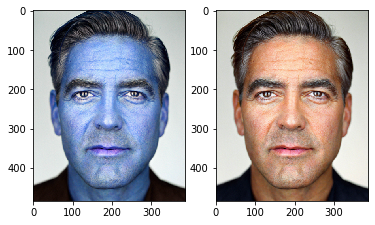

In [7]:
img = cv2.imread('george.jpg')
size = img.shape
nimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(img)

f.add_subplot(1,2, 2)
plt.imshow(nimg)

plt.show(block=True)

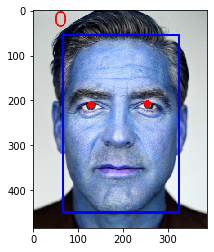

Detected faces: 1


In [8]:
face_embeddings = []
face_landmarks = []
usedface = []

usedface = img

faces = model.get(usedface)
for idx, face in enumerate(faces):
    bbox = face.bbox.astype(np.int).flatten()
    landmark = face.landmark.astype(np.int).flatten()
    embedding = face.embedding.astype(np.float).flatten()
    
    face_embeddings.append(embedding)
    face_landmarks.append(landmark)
    
    cv2.circle(img, (landmark[0], landmark[1]), 4, (255, 0, 0), 8)
    cv2.circle(img, (landmark[2], landmark[3]), 4, (255, 0, 0), 8)
    # cv2.circle(img, (landmark[4], landmark[5]), 4, (255, 0, 0), 8)
    # cv2.circle(img, (landmark[6], landmark[7]), 4, (255, 0, 0), 8)
    # cv2.circle(img, (landmark[8], landmark[9]), 4, (255, 0, 0), 8)
    
    cv2.rectangle(usedface, (bbox[0], bbox[1]), (bbox[2], bbox[3]), color, 3)
    cv2.putText(usedface, str(idx), (bbox[0] - 20, bbox[1] - 20), font, 1.5, (255, 0, 0), 2, cv2.LINE_AA)
    
plt.imshow(usedface)
plt.show()
print('Detected faces: ' + str(len(faces)))

In [9]:
print(face_embeddings[0].shape)
# print(face_embeddings[0])
# with np.printoptions(precision=100, suppress=True):
#     np.savetxt('face_embeddings.csv', face_embeddings, delimiter=',')
    
np.save('data.npy', face_embeddings)

(512,)


In [10]:
print(findCosineDistance(face_embeddings[0], face_embeddings[1]))

IndexError: list index out of range

In [ ]:
focal_length = size[1]
center = (size[1]/2, size[0]/2)
camera_matrix = np.array(
                         [[focal_length, 0, center[0]],
                         [0, focal_length, center[1]],
                         [0, 0, 1]], dtype = "double"
                         )

In [ ]:
print('Camera Matrix :\n {0}'.format(camera_matrix))

AttributeError: module 'insightface' has no attribute 'model'